In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from string import ascii_letters, digits, punctuation

In [6]:
data = np.log(np.linspace(1,100, 100))

In [41]:
def get_ascii_pixels(pixel_dim):
    font = ImageFont.truetype('FreeMono.ttf', pixel_dim + int(pixel_dim/4))
    
    char_matrix = None
    characters = ascii_letters + digits + punctuation + " "
    characters = punctuation + " "
    
    for char in characters:
        img = Image.new('L', (pixel_dim,pixel_dim), color = 255)
        img_text = ImageDraw.Draw(img)
        img_text.text((pixel_dim/4,pixel_dim/4*-1),char, font=font, fill = (0))
        img = np.array(img).reshape(-1, pixel_dim, pixel_dim)
        if char_matrix is None:
            char_matrix = img
        else:
            char_matrix = np.vstack([char_matrix, img])
    return char_matrix

In [65]:
def get_graph_pixels(data):
    fig, ax = plt.subplots(figsize=(6.72, 1.92))
    ax.plot(data, linewidth = 1)
    fig.canvas.draw()
    
    image = np.frombuffer(fig.canvas.tostring_rgb(),  dtype=np.uint8,)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    im = Image.fromarray(image).convert('L')
    return np.array(im)

In [66]:
def get_ascii_encoding(graph, pixel_dim):
    chars_matrix = get_ascii_pixels(pixel_dim)
    characters = ascii_letters + digits + punctuation + " "
    characters = punctuation + " "
    rtn_chars = []
    
    
    for row in range(0, int(graph.shape[0]/pixel_dim) - 2):
        char_row = []
        
        for col in range(0, int(graph.shape[1]/pixel_dim) - 2):
            subset = graph[row * pixel_dim:(row + 1) * pixel_dim,
                          col * pixel_dim:(col + 1) * pixel_dim]
        
            diffs = np.abs([np.sum(subset - chars_matrix[idx]) for idx in range(0, chars_matrix.shape[0])])
            char_row.append(characters[np.argmin(diffs)])
        rtn_chars.append("".join(char_row))
    return rtn_chars

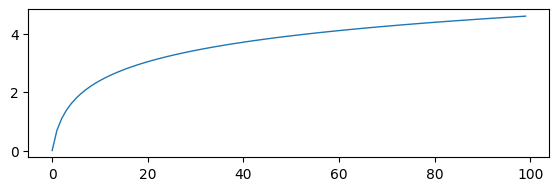

In [67]:
graph = get_graph_pixels(data)

In [76]:
z = get_ascii_encoding(graph, pixel_dim=8)

In [77]:
with open("temp.txt", "w") as file_out:
    for l in z:
        file_out.write(l + "\n")
        print(l)

                                                                                  
                                                                                  
          __________________________________________________________________      
          ]````````````````````````````````````````````````````````````??``[      
          ]                                            _ .,.+ =+*"'^``     [      
          %                                  __,& =*='``                   [      
        = ]                         ___.-=*"``                             [      
          ]                     .-=*"`                                     [      
          ]                .-+"`                                           [      
          ]             ,="                                                [      
          ]          ,+`                                                   [      
          ]        .*                                                      [      
    

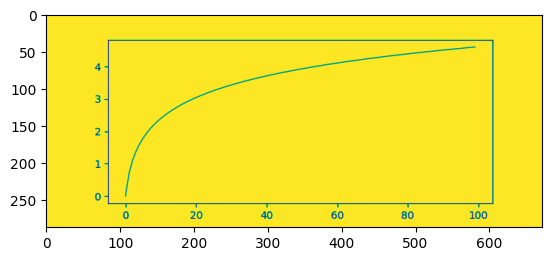

In [64]:
plt.imshow(graph)